simple polynomial modelling

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

a polynomial case with a function with noise and degree of 6

In [60]:
#points
def data_points(range_start, range_end, num_samples=1000, noise_std=10.0):
  x = np.random.uniform(range_start, range_end, num_samples);
  noise = np.random.normal(0, noise_std, num_samples);
  y = .2*x**6 - .5*x**5 + 2*x**4 -5*x**3 + 3*x**2 - 10*x + 5 + noise;
  # print(x[:10] ,f'y is {y[:10]}');
  return x,y;

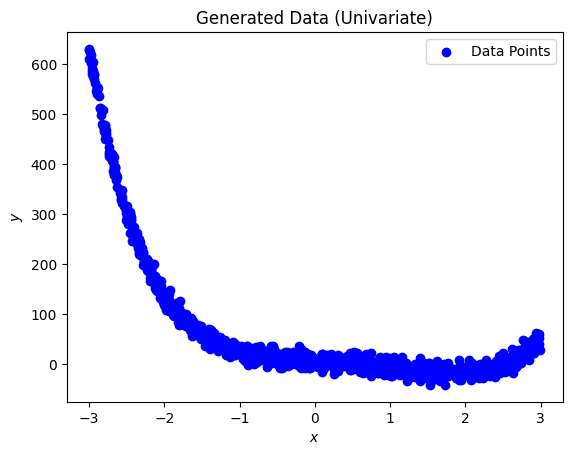

In [71]:
x,y = data_points(-3, 3);
plt.scatter(x, y, color='blue', label='Data Points')
plt.title("Generated Data (Univariate)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

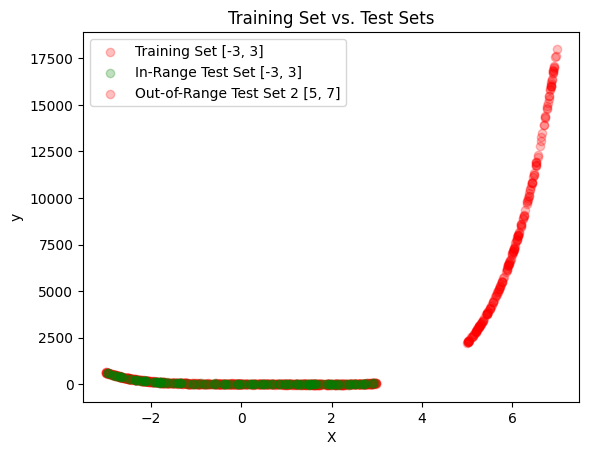

In [75]:
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(x, y, test_size=0.2, random_state=42);
x_out , y_out = data_points(5, 7);
_, X_test_out_of_range, _, y_test_out_of_range = train_test_split(x_out, y_out, test_size=0.2, random_state=42)
plt.scatter(X_train, y_train, color='red', alpha=0.25, label='Training Set [-3, 3]');
plt.scatter(X_test_in_range, y_test_in_range, color='green', alpha=0.25, label='In-Range Test Set [-3, 3]')
plt.scatter(X_test_out_of_range, y_test_out_of_range, color='red', alpha=0.25, label='Out-of-Range Test Set 2 [5, 7]')
plt.legend()
plt.title('Training Set vs. Test Sets')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [78]:
def train_models(X, y, degree):
  features = PolynomialFeatures(degree=degree)
  lr = LinearRegression()
  model = make_pipeline(features, lr)
  model.fit(X.reshape(-1, 1), y)

  return model
models = {}
degree = 9
for d in range(2, degree + 1):
    models[d] = train_models(X_train, y_train, d)
def evaluate_models(models, X_test, y_test):
    losses = {}
    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        losses[degree] = mean_squared_error(y_test, y_pred)

    return losses
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

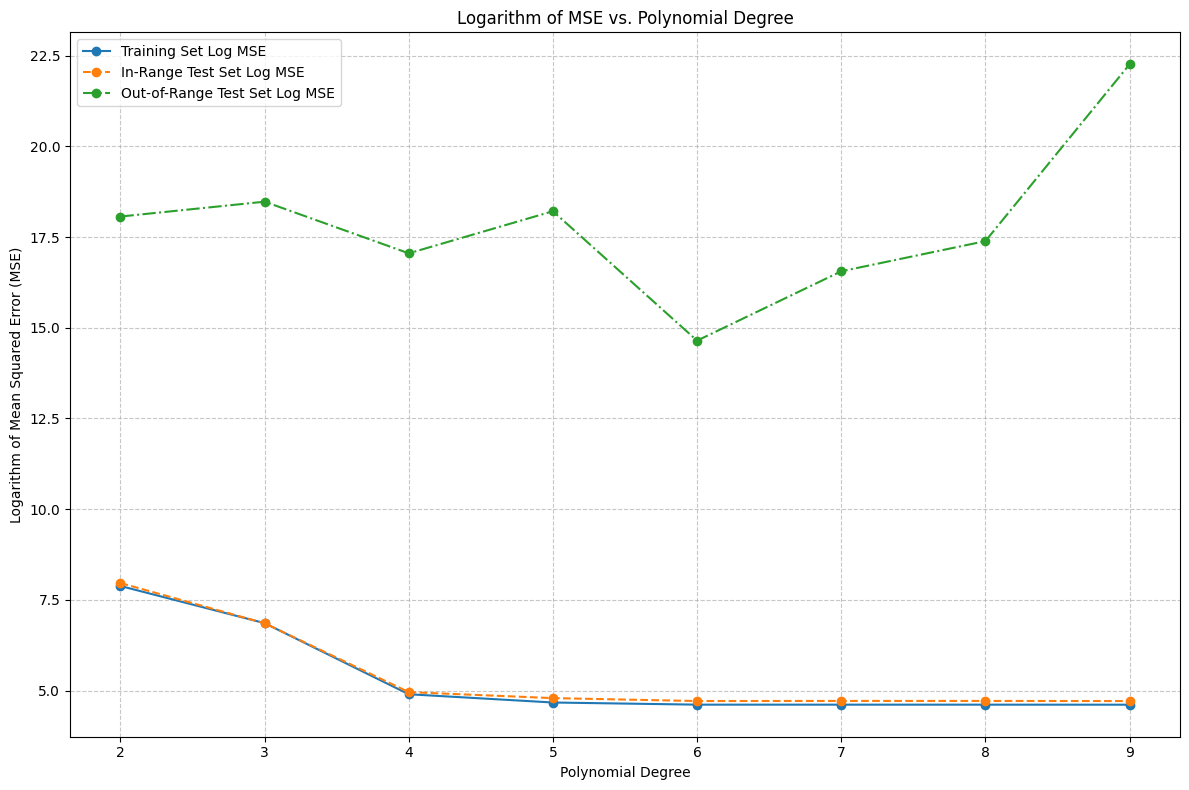

In [79]:
log_losses_train = np.log1p(list(losses_train.values()))
log_losses_in_range = np.log1p(list(losses_in_range.values()))
log_losses_out_of_range = np.log1p(list(losses_out_of_range.values()))

degrees = range(2, degree + 1)
plt.figure(figsize=(12, 8))
plt.plot(degrees, list(log_losses_train), marker='o', linestyle='-', label='Training Set Log MSE')
plt.plot(degrees, list(log_losses_in_range), marker='o', linestyle='--', label='In-Range Test Set Log MSE')
plt.plot(degrees, list(log_losses_out_of_range), marker='o', linestyle='-.', label='Out-of-Range Test Set Log MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Logarithm of Mean Squared Error (MSE)')
plt.title('Logarithm of MSE vs. Polynomial Degree')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(degrees)
plt.tight_layout()
plt.show()
